In [1]:
#pip check

In [2]:
#pip list -o

In [3]:
pip show egttools

Name: egttools
Version: 0.1.12
Summary: Efficient Python library for EGT
Home-page: https://github.com/Socrats/EGTTools
Author: Elias F. Domingos
Author-email: elias.fernandez.domingos@vub.be
License: GPLv3
Location: c:\users\zxcas\anaconda3\lib\site-packages
Requires: matplotlib, networkx, numpy, scipy, seaborn
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install -U egttools

In [5]:
pip list

Package                            Version
---------------------------------- ---------
absl-py                            0.11.0
alabaster                          0.7.12
anaconda-client                    1.11.0
anaconda-navigator                 2.3.2
anaconda-project                   0.11.1
anyio                              3.5.0
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
asn1crypto                         1.5.1
astroid                            2.4.2
astropy                            4.0.2
asttokens                          2.0.5
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.5.4
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
bac

In [6]:
import numpy as np
import egttools as egt
import matplotlib.pylab as plt
import math

from egttools.analytical import replicator_equation
from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games,)
from egttools.plotting import plot_gradients

from egttools.analytical import StochDynamics

from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games, )
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex

from egttools.plotting.helpers import (xy_to_barycentric_coordinates, 
                                       barycentric_to_xy_coordinates,
                                       calculate_stationary_points, 
                                       calculate_stability,find_roots_in_discrete_barycentric_coordinates)
from egttools.helpers.vectorized import vectorized_replicator_equation, vectorized_barycentric_to_xy_coordinates



Evolutionary dynamics of Hawk-Dove

In [7]:
# Payoff matrix
V = 2; D = 3; T = 1
A = np.array([
        [ (V-D)/2, V],
        [ 0      , (V/2) - T],
    ])

In [8]:
nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)

In [9]:
# Calculate gradient
gradient_function = lambda x: egt.analytical.replicator_equation(x, A)
gradients = egt.analytical.utils.calculate_gradients(np.array((strategy_i, 1 - strategy_i)).T, 
                                                     gradient_function)

In [10]:
roots = egt.analytical.utils.find_roots(gradient_function, 2, 
                                        nb_initial_random_points=10,
                                       method="hybr")
stability = egt.analytical.utils.check_replicator_stability_pairwise_games(roots, A)

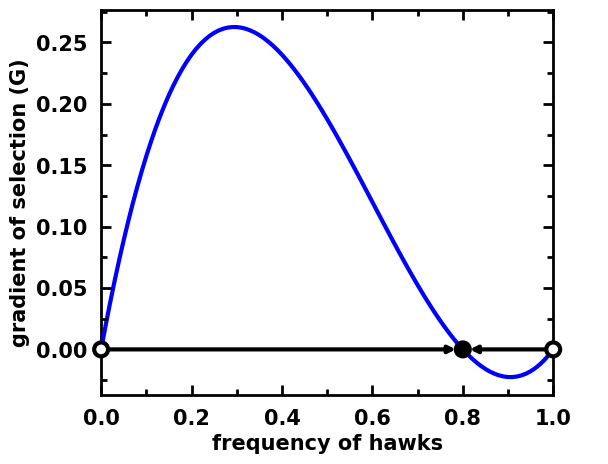

In [11]:
egt.plotting.indicators.plot_gradients(gradients[:, 0], 
                                       xlabel="frequency of hawks", 
                                       roots=roots, stability=stability)
plt.savefig("hawk_dove_gradient.png", dpi=300)

In [12]:
# Parameters and evolver
nb_strategies = 2; Z = 100; N = 2;
beta = 1
pop_states = np.arange(0, Z + 1, 1)
strategy_i = np.linspace(0, 1, num=Z + 1, dtype=np.float64)
evolver = StochDynamics(nb_strategies, A, Z)

In [13]:
gradients = np.array([evolver.gradient_selection(x, 0, 1, beta) 
                      for x in pop_states])

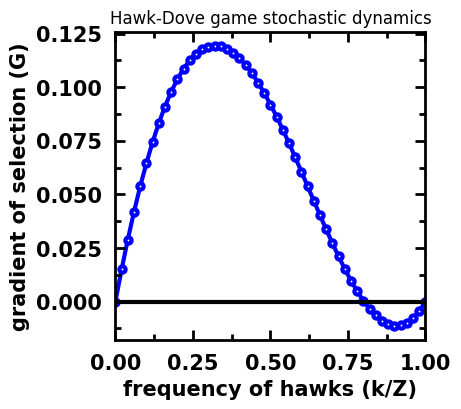

In [14]:
plot_gradients(gradients, figsize=(4,4), fig_title="Hawk-Dove game stochastic dynamics", 
               marker_facecolor='white',
               xlabel="frequency of hawks (k/Z)", marker="o", marker_size=20, marker_plot_freq=2)
plt.show()

Numerical simulations (old, new)

In [15]:
egt.Random.init()
seed = egt.Random._seed

In [16]:
# Payoff matrix
V = 2; D = 3; T = 1
A = np.array([
        [ (V-D)/2, V],
        [ 0      , (V/2) - T],
    ])

In [17]:
A

array([[-0.5,  2. ],
       [ 0. ,  0. ]])

In [18]:
game = egt.games.NormalFormGame(1, A)

In [19]:
Z = 100
x = np.arange(0, Z+1)/Z

In [20]:
#evolver = egt.numerical.PairwiseMoran(Z, game, 1000000)

In [21]:
#Z = 100
#x = np.arange(0, Z+1)/Z
#evolver.pop_size = Z

In [22]:
#dist = evolver.estimate_stationary_distribution(10, int(1e6), int(1e3), 1, 1e-3)

In [23]:
# We need to reverse, since in this case we are starting from the case
# where the number of Haws is 100%, because of how we map states

#fig, ax = plt.subplots(figsize=(5, 4))
#fig.patch.set_facecolor('white')
#lines = ax.plot(x, list(reversed(dist)))
#plt.setp(lines, linewidth=2.0)
#ax.set_ylabel('stationary distribution',size=16)
#ax.set_xlabel('$k/Z$',size=16)
#ax.set_xlim(0, 1)
#plt.show()

New version:

In [24]:
evolver.mu = 1e-3
stationary_with_mu = evolver.calculate_stationary_distribution(beta)

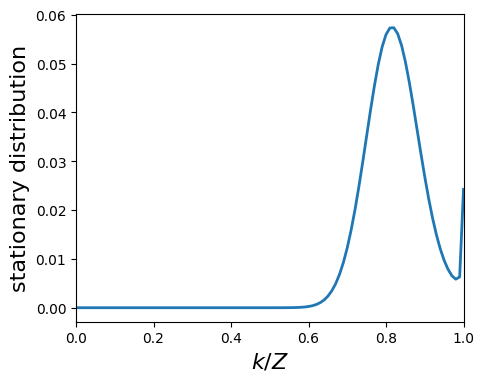

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
fig.patch.set_facecolor('white')
lines = ax.plot(np.arange(0, Z+1)/Z, stationary_with_mu[::-1])
plt.setp(lines, linewidth=2.0)
ax.set_ylabel('stationary distribution',size=16)
ax.set_xlabel('$k/Z$',size=16)
ax.set_xlim(0, 1)
plt.show()

SVOのエージェントクラス

In [26]:
from egttools.numerical.numerical.behaviors.NormalForm import AbstractNFGStrategy

SVO名称への変換

In [27]:
SVONameList = [
    "IND",
    "COOP",
    "ALT",
    "MARTY",
    "MASO",
    "SADOMASO",
    "SADO",
    "COMP",
]

def NamingSVO(angle):
    list_index = int((angle / 45) % 8)
    return SVONameList[list_index]

print(NamingSVO(180))

MASO


SVOに基づくのみのエージェント（マトリックスのペイオフ値にのみ依存する）

In [28]:
class SVOStrategy(AbstractNFGStrategy):
    def __init__(self, payoff_matrix: np.array, angle):
        super().__init__()
        self.payoff_matrix_ = payoff_matrix
        self.angle_ = angle
        self.other_w_ = math.sin(math.radians(angle))
        self.self_w_ = math.cos(math.radians(angle))
        #self.NAME_ = str(angle)+"svo"
        self.NAME_ = NamingSVO(angle)

    def get_action(self, time_step: int, action_prev: int, box_ = "def"):
        #box = self.payoff_matrix_
        box = box_
        if box == "def":
            box = self.payoff_matrix_
        o_ = self.other_w_
        s_ = self.self_w_
        EU_ = box[0,0] * s_ + box[0,0] * o_ + box[0,1] * s_ + box[1,0] * o_ - box[1,0] * s_ - box[0,1] * o_ - box[1,1] * s_ - box[1,1] * o_
        
        EU_ = round(EU_,10)
        #print("EU_ = ",EU_)
        
        #print(1 if EU_ > 0 else 0)
        #return 1 if EU_ >= 0 else 0
        return 0 if EU_ >= 0 else 1

    def type(self):
        return self.NAME_

    def is_stochastic(self):
        return False

    def __str__(self):
        return self.type()

SVOに基づき、相手の行動頻度から予測するエージェントクラス

In [29]:
class FrequencySVOStrategy(AbstractNFGStrategy):
    def __init__(self, payoff_matrix: np.array, angle):
        super().__init__()
        self.payoff_matrix_ = payoff_matrix
        self.angle_ = angle
        self.other_w_ = math.sin(math.radians(angle))
        self.self_w_ = math.cos(math.radians(angle))
        #self.NAME_ = str(angle)+"fre_svo"
        self.NAME_ = NamingSVO(angle)+" FREQ"

        #内部変数：相手の選択数の保持
        self.opp_s_0_ = 0
        self.opp_s_1_ = 0

    def get_action(self, time_step: int, action_prev: int, box_ = "def"):
        #print(time_step)
        
        #box = self.payoff_matrix_
        box = box_
        if box == "def":
            box = self.payoff_matrix_
        
        if time_step == 2:
            self.opp_s_0_ = 0
            self.opp_s_1_ = 0

        if action_prev == 0:
            self.opp_s_0_ += 1
        else:
            self.opp_s_1_ += 1

        if time_step == 1:
            self.opp_s_0_ = 1
            self.opp_s_1_ = 1
        
        sum_opp_s = self.opp_s_0_ + self.opp_s_1_
        p_0 = self.opp_s_0_ / sum_opp_s
        p_1 = self.opp_s_1_ / sum_opp_s

        print(p_0,self.NAME_)
        #box = self.payoff_matrix_
        o_ = self.other_w_
        s_ = self.self_w_
        EU_ = (box[0,0] * s_ + box[0,0] * o_)*p_0 + (box[0,1] * s_ + box[1,0] * o_)*p_1 - (box[1,0] * s_ + box[0,1] * o_)*p_0 - (box[1,1] * s_ + box[1,1] * o_)*p_1
        
        EU_ = round(EU_,10)
        #print("EU_ = ",EU_)
        
        #print(1 if EU_ > 0 else 0)
        #return 1 if EU_ >= 0 else 0
        return 0 if EU_ >= 0 else 1

    def type(self):
        return self.NAME_

    def is_stochastic(self):
        return False

    def __str__(self):
        return self.type()

SVOに基づき、相手のSVOを予測して、相手の行動を予測するエージェントクラス

In [30]:
#ラジアン、角度に変換
print(math.degrees(math.atan(0.1)))

5.710593137499643


In [31]:
class MindReadingSVOStrategy(AbstractNFGStrategy):
    def __init__(self, payoff_matrix: np.array, angle):
        super().__init__()
        self.payoff_matrix_ = payoff_matrix
        self.angle_ = angle
        self.other_w_ = math.sin(math.radians(angle))
        self.self_w_ = math.cos(math.radians(angle))
        #self.NAME_ = str(angle)+"mind_svo"
        self.NAME_ = NamingSVO(angle)+" MIND"

        #内部変数：相手のSVOの予測リスト
        self.opp_svo_list_ = np.array([0,0,0,0,0,0,0,0])
        #内部変数：相手の「1を選ぶ確率」
        self.opp_p_0_ = 0.5
        self.opp_p_1_ = 0.5

    def get_action(self, time_step: int, action_prev: int, box_ = "def"):
        #box = self.payoff_matrix_
        box = box_
        if box == "def":
            box = self.payoff_matrix_
        o_ = self.other_w_
        s_ = self.self_w_
        p_0_ = self.opp_p_0_
        p_1_ = self.opp_p_1_

        if time_step == 1:
            p_0_ = 0.5
            self.opp_p_0_ = p_0_
            p_1_ = 0.5
            self.opp_p_1_ = p_1_
            self.opp_svo_list_ = np.array([0,0,0,0,0,0,0,0])
            #print("init__")
        else:
            #print("omomo")

            #相手の候補を決めるための計算
            row_over =  box[0,0] * p_0_ + box[0,1] * p_1_ - box[1,0] * p_0_ - box[1,1] * p_1_
            row_under = box[0,0] * p_0_ + box[1,0] * p_1_ - box[0,1] * p_0_ - box[1,1] * p_1_
            _tan = -(row_over) / (row_under)
            if row_over == 0 and row_under == 0:
                _tan = -1
            
            arc_ = math.degrees(math.atan(_tan))

            if arc_ < 0:
                arc_ += 360
            if row_under < 0:
                arc_ += 180
            
            slicer = arc_ / 45
            slicer_f = math.floor(slicer)

            slice8 = int(slicer_f) % 8
            
            if action_prev == 0:
                for i in range(slice8+5,slice8+4+5):
                    #print(i)
                    index_tan = i
                    index_tan = index_tan % 8
                    self.opp_svo_list_[index_tan] += 1
            else:
                for i in range(slice8+4+5,slice8+8+5):
                    #print(i)
                    index_tan = i
                    index_tan = index_tan % 8
                    self.opp_svo_list_[index_tan] += 1

            #選択するのが1か0かをそれぞれのSVOで計算する
            svo_ch = [0,0,0,0,0,0,0,0]
            #リストの確率化
            svo_leg = self.opp_svo_list_
            #print(svo_leg,sum(svo_leg))
            #sum_svo_leg = sum(svo_leg)
            svo_leg = svo_leg / sum(svo_leg)

            for i in range(len(svo_ch)):
                svo_ch_angle = 45 * i
                ss_ = math.sin(math.radians(svo_ch_angle))
                oo_ = math.cos(math.radians(svo_ch_angle))
                if (box[0,0] * ss_ + box[0,0] * oo_)*p_0_ + (box[0,1] * ss_ + box[1,0] * oo_)*p_1_ - (box[1,0] * ss_ + box[0,1] * oo_)*p_0_ - (box[1,1] * ss_ + box[1,1] * oo_)*p_1_ == 0:
                    svo_ch[i] = 1.0 * svo_leg[i]
                else:
                    svo_ch[i] = 0.0 * svo_leg[i]

            p_0_ = sum(svo_ch)
            self.opp_p_0_ = p_0_
            p_1_ = 1 - p_0_
            self.opp_p_1_ = p_1_


        #print(p_0_)
        EU_ = (box[0,0] * s_ + box[0,0] * o_)*p_0_ + (box[0,1] * s_ + box[1,0] * o_)*p_1_ - (box[1,0] * s_ + box[0,1] * o_)*p_0_ - (box[1,1] * s_ + box[1,1] * o_)*p_1_
        
        EU_ = round(EU_,10)
        #print("EU_ = ",EU_)
        
        #print(1 if EU_ > 0 else 0)
        #return 1 if EU_ >= 0 else 0
        print(p_0_,self.NAME_)
        return 0 if EU_ >= 0 else 1

    def type(self):
        return self.NAME_

    def is_stochastic(self):
        return False

    def __str__(self):
        return self.type()

In [32]:
BBA = np.array([
    [3, 1],
    [4, 2]
])
print(BBA)

for i in range(8):
    mama = SVOStrategy(BBA,45*i)
    print(mama.get_action(1,1))

[[3 1]
 [4 2]]
1
0
0
0
0
1
1
1


In [33]:
momoom = MindReadingSVOStrategy(BBA,45)
print(momoom.get_action(0,1))

0.0 COOP MIND
0


Fixation probabilities and Invasion diagram

In [34]:
egt.Random.init()
seed = egt.Random._seed

In [35]:
T=4; R=2; P=1; S=0

#囚人のジレンマ
T=1; R=2; P=3; S=4

#P=4; T=1; S=3; R=2

#T=10; R=2; P=15; S=3
A = np.array([
    [P, T],
    [S, R]
])

print(A)

[[3 1]
 [4 2]]


In [36]:
myan_ss = egt.behaviors.NormalForm.TwoActions.TFTT()

print(myan_ss.get_action(3,1))

1


In [37]:

#上の戦略リストだとすごい時間がかかる（遅め）
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT(),
              egt.behaviors.NormalForm.TwoActions.Pavlov(), 
              egt.behaviors.NormalForm.TwoActions.Random(), 
              egt.behaviors.NormalForm.TwoActions.GRIM(),
              egt.behaviors.NormalForm.TwoActions.TFTT(),
              SVOStrategy(A,90),
              FrequencySVOStrategy(A,90)]
#]

"""
strategies = [FrequencySVOStrategy(A,0),
              FrequencySVOStrategy(A,45),
              FrequencySVOStrategy(A,90),
              FrequencySVOStrategy(A,135),
              FrequencySVOStrategy(A,180),
              FrequencySVOStrategy(A,225),
              FrequencySVOStrategy(A,270),
              FrequencySVOStrategy(A,315),
]
"""

""""""

strategies = [FrequencySVOStrategy(A,0),
              FrequencySVOStrategy(A,45),
              FrequencySVOStrategy(A,90),
              FrequencySVOStrategy(A,135),
              FrequencySVOStrategy(A,180),
              FrequencySVOStrategy(A,225),
              FrequencySVOStrategy(A,270),
              FrequencySVOStrategy(A,315),
              MindReadingSVOStrategy(A,0),
              MindReadingSVOStrategy(A,45),
              MindReadingSVOStrategy(A,90),
              MindReadingSVOStrategy(A,135),
              MindReadingSVOStrategy(A,180),
              MindReadingSVOStrategy(A,225),
              MindReadingSVOStrategy(A,270),
              MindReadingSVOStrategy(A,315),
              SVOStrategy(A,0),
              SVOStrategy(A,45),
              SVOStrategy(A,90),
              SVOStrategy(A,135),
              SVOStrategy(A,180),
              SVOStrategy(A,225),
              SVOStrategy(A,270),
              SVOStrategy(A,315),]


In [38]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [39]:
strategy_labels

['IND FREQ',
 'COOP FREQ',
 'ALT FREQ',
 'MARTY FREQ',
 'MASO FREQ',
 'SADOMASO FREQ',
 'SADO FREQ',
 'COMP FREQ',
 'IND MIND',
 'COOP MIND',
 'ALT MIND',
 'MARTY MIND',
 'MASO MIND',
 'SADOMASO MIND',
 'SADO MIND',
 'COMP MIND',
 'IND',
 'COOP',
 'ALT',
 'MARTY',
 'MASO',
 'SADOMASO',
 'SADO',
 'COMP']

In [40]:
#100(第1引数)：実行ゲーム数？（print量が減った）

game = egt.games.NormalFormGame(2, A, strategies)

#戦略数×戦略数の表
print(game.expected_payoffs())

print(game)

1.0 IND FREQ
1.0 IND FREQ
0.5 IND FREQ
0.5 IND FREQ
0.6666666666666666 IND FREQ
1.0 COOP FREQ
0.5 IND FREQ
0.5 COOP FREQ
0.6666666666666666 IND FREQ
1.0 ALT FREQ
0.5 IND FREQ
0.5 ALT FREQ
0.6666666666666666 IND FREQ
1.0 MARTY FREQ
0.5 IND FREQ
0.5 MARTY FREQ
0.6666666666666666 IND FREQ
1.0 MASO FREQ
0.5 IND FREQ
0.5 MASO FREQ
0.6666666666666666 IND FREQ
1.0 SADOMASO FREQ
0.5 IND FREQ
0.5 SADOMASO FREQ
0.6666666666666666 IND FREQ
1.0 SADO FREQ
0.5 IND FREQ
0.5 SADO FREQ
0.6666666666666666 IND FREQ
1.0 COMP FREQ
0.5 IND FREQ
0.5 COMP FREQ
0.6666666666666666 IND FREQ
0.0 IND MIND
0.5 IND FREQ
0.5 IND MIND
0.6666666666666666 IND FREQ
0.0 COOP MIND
0.5 IND FREQ
0.5 COOP MIND
0.6666666666666666 IND FREQ
0.0 ALT MIND
0.5 IND FREQ
0.5 ALT MIND
0.6666666666666666 IND FREQ
0.0 MARTY MIND
0.5 IND FREQ
0.5 MARTY MIND
0.6666666666666666 IND FREQ
0.0 MASO MIND
0.5 IND FREQ
0.5 MASO MIND
0.6666666666666666 IND FREQ
0.0 SADOMASO MIND
0.5 IND FREQ
0.5 SADOMASO MIND
0.6666666666666666 IND FREQ
0.0 SADO 

In [41]:
#鹿狩り
P=4; T=1; S=3; R=2

#囚人のジレンマ
T=1; R=2; P=3; S=4

#T=10; R=2; P=15; S=3
MU = np.array([
    [P, T],
    [S, R]
])

print(MU)
print()

for i in range(len(strategies)):
    #print(strategies[i].payoff_matrix_)
    strategies[i].payoff_matrix_ = MU
    #print(strategies[i].payoff_matrix_)

[[3 1]
 [4 2]]



In [42]:
#100(第1引数)：実行ゲーム数？（print量が減った）

#game_2 = egt.games.NormalFormGame(5, MU, strategies)

#戦略数×戦略数の表
#print(game_2.expected_payoffs())

#print(game_2)

In [43]:
#game_sum_pay = (game.expected_payoffs() + game_2.expected_payoffs() ) /2
#print(game_sum_pay)

In [44]:
Z= 100; beta=1
evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)
#evolver = egt.analytical.StochDynamics(len(strategies), game_sum_pay, Z)

print(evolver)

In [45]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

#print(transition_matrix)
print()

#print(fixation_probabilities)
print()

#print(stationary_distribution)

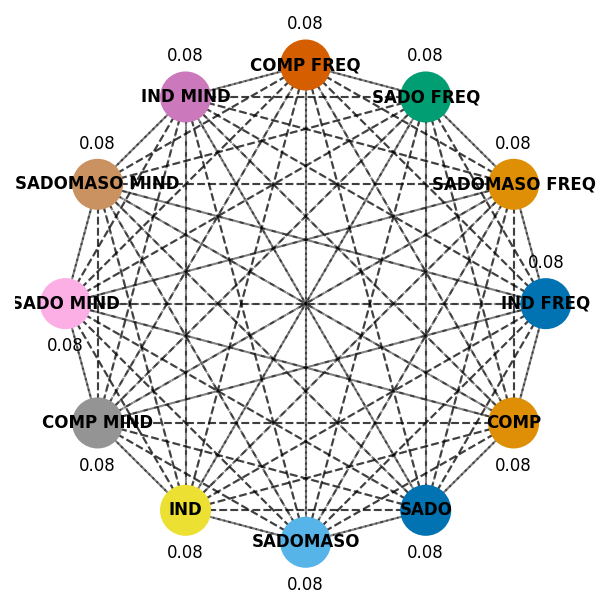

In [46]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=0.00001, 
                                              max_displayed_label_letters = 15,
                                              ax=ax)
plt.axis('off')
plt.show() # display

#文字がたくさん入るようにしたいね

nステップゲームの実装

・戦略リストを受け取る

・平均ペイオフマトリックスを出力する

・上だと


引数

rounds：ゲームの実行数

matrixList：それぞれのゲームのマトリックス

strategies：戦略リスト

In [47]:
class TwoStepsGame():
    #def get_action(self, time_step: int, action_prev: int):
    def __init__(self, rounds=2, matrixList=np.array([[[3, 1],[4, 2]],[[3, 1],[4, 2]]]), strategies=[SVOStrategy(A,0),SVOStrategy(A,90)],DEBUG=False):
        self.rounds_ = rounds
        self.matrixList_ = matrixList
        self.strategies_ = strategies
        self.DEBUG_ = DEBUG

    def CalculateSimulation(self):
        #print("Simu")

        strategies_Num = len(self.strategies_)
        #print(strategies_Num)

        ave_payoffs_list = np.zeros((strategies_Num,strategies_Num))
        #ave_payoffs_list = [[0] * strategies_Num]*strategies_Num
        #print(ave_payoffs_list)
        #print(ave_payoffs_list[0][0])

        for i in range(strategies_Num):
            for j in range(strategies_Num):
                main_s = self.strategies_[i]
                main_s_act = 0
                opp_s = self.strategies_[j]
                opp_s_act = 0

                #print(main_s.type()," and ",opp_s.type())

                # 選択頻度 self.opp_s_0_ = 0
                # SVO候補 self.opp_svo_list_ = np.array([0,0,0,0,0,0,0,0])

                #if i < 8:
                    #print(" opp_s_0 = ",main_s.opp_s_0_)
                    #main_s.opp_s_0_ = 0
                    #main_s.opp_s_1_ = 0
                #elif i < 16:
                    #main_s.opp_svo_list_ = np.array([0,0,0,0,0,0,0,0])
                    #print(" opp_svo_list = ",main_s.opp_svo_list_)
                
                if self.DEBUG_:
                    print()
                    print(main_s.type()," main : opp ",opp_s.type())

                for steps in range(self.rounds_):
                    box = self.matrixList_[steps]
                    #print("m",steps)

                    #print(main_s.payoffs_matrix_)
                    
                    main_s.payoffs_matrix_ = box
                    opp_s.payoffs_matrix_ = box

                    #print(main_s.payoffs_matrix_)

                    #main_s_true = 0
                    main_s_act = main_s.get_action(steps+1, opp_s_act,box)
                    #if main_s_act == 0:
                    #    main_s_true = 1
                    #else:
                    #    main_s_true = 0

                    #opp_s_true = 0
                    opp_s_act = opp_s.get_action(steps+1, main_s_act,box)
                    #if opp_s_act == 0:
                    #    opp_s_true = 1
                    #else:
                    #    opp_s_true = 0
                    if self.DEBUG_:
                        #print(main_s.type()," main : opp ",opp_s.type())
                        print(main_s_act," main : opp  ",opp_s_act)

                    ave_payoffs_list[i][j] += box[main_s_act][opp_s_act]
                    if self.DEBUG_:
                        print("main score: ",box[main_s_act][opp_s_act])

                    #if i > 7 and i < 16:
                        #print(" opp_svo_list = ",main_s.opp_svo_list_, " : chose ",main_s_act," ",main_s.type()," :opp chose ",opp_s_act,":",opp_s.type())

                ave_payoffs_list[i][j] /= self.rounds_

                #if i < 8:
                    #print(" opp_s_0 = ",main_s.opp_s_0_)
                    #main_s.opp_s_0_ = 0
                    #main_s.opp_s_1_ = 0
                #elif i < 16:
                    #main_s.opp_svo_list_ = np.array([0,0,0,0,0,0,0,0])
                    #print(" opp_svo_list = ",main_s.opp_svo_list_)

                #if i < 8:
                    #print(" opp_s_0 = ",main_s.opp_s_0_, " :",main_s.type()," :opp :",opp_s.type())

                if i > 7 and i < 16:
                    print(" opp_svo_list = ",main_s.opp_svo_list_, " : chose ",main_s_act," ",main_s.type()," :opp chose ",opp_s_act,":",opp_s.type())

        #print(ave_payoffs_list)

        return ave_payoffs_list





In [48]:
Matlist = np.array([
    #鹿狩りゲーム
    [[4,1],
     [3,2]],
    #鹿狩りゲーム
    [[2,3],
     [1,4]],
    #鹿狩りゲーム
    [[3,1],
     [2,2]],
    #鹿狩りゲーム
    [[2,2],
     [1,3]],
    #鹿狩りゲーム
    [[4,1],
     [2,2]],
    #鹿狩りゲーム
    [[2,2],
     [1,4]],
    #鹿狩りゲーム
    [[4,1],
     [3,3]],
    #鹿狩りゲーム
    [[3,3],
     [1,4]],
    #鹿狩りゲーム
    [[4,2],
     [3,3]],
    #鹿狩りゲーム
    [[3,3],
     [2,4]],

    #囚人のジレンマ
    [[3,1],
     [4,2]],
     #囚人のジレンマ
    [[3,1],
     [4,2]],
     #囚人のジレンマ
    [[3,1],
     [4,2]],
     #囚人のジレンマ
    [[3,1],
     [4,2]],
     #囚人のジレンマ
    [[3,1],
     [4,2]],
])


Matlist = np.array([
    #囚人のジレンマ
    [[3,1],
     [4,2]],
    #deadlock
    [[2,1],
     [4,3]],
    #Concord
    [[4,2],
     [3,1]],
    #Ha Ch
    [[3,2],
     [4,1]],
    #Compromise
    [[1,2],
     [4,3]],
    ])

"""
Matlist = np.array([
    #鹿狩り
    [[4,1],
     [3,2]],
    #囚人のジレンマ
    [[3,1],
     [4,2]],
    ])
"""


'\nMatlist = np.array([\n    #鹿狩り\n    [[4,1],\n     [3,2]],\n    #囚人のジレンマ\n    [[3,1],\n     [4,2]],\n    ])\n'

In [49]:
strategies_list = [FrequencySVOStrategy(A,0),
            FrequencySVOStrategy(A,45),
            FrequencySVOStrategy(A,90),
            FrequencySVOStrategy(A,135),
            FrequencySVOStrategy(A,180),
            FrequencySVOStrategy(A,225),
            FrequencySVOStrategy(A,270),
            FrequencySVOStrategy(A,315),
            MindReadingSVOStrategy(A,0),
            MindReadingSVOStrategy(A,45),
            MindReadingSVOStrategy(A,90),
            MindReadingSVOStrategy(A,135),
            MindReadingSVOStrategy(A,180),
            MindReadingSVOStrategy(A,225),
            MindReadingSVOStrategy(A,270),
            MindReadingSVOStrategy(A,315),
            SVOStrategy(A,0),
            SVOStrategy(A,45),
            SVOStrategy(A,90),
            SVOStrategy(A,135),
            SVOStrategy(A,180),
            SVOStrategy(A,225),
            SVOStrategy(A,270),
            SVOStrategy(A,315),]

"""
strategies_list = [
            SVOStrategy(A,0),
            SVOStrategy(A,45),
            SVOStrategy(A,90),
            SVOStrategy(A,135),
            SVOStrategy(A,180),
            SVOStrategy(A,225),
            SVOStrategy(A,270),
            SVOStrategy(A,315),]"""

strategy_labels_sample = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies_list]

In [50]:
bow = TwoStepsGame(len(Matlist),Matlist,strategies_list)
nya = bow.CalculateSimulation()
print(nya)

#bon = nya.tolist()

#print(bon)

C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\3330976997.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":
C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\3267850945.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":


0.5 IND FREQ
0.5 IND FREQ
0.0 IND FREQ
0.0 IND FREQ
0.0 IND FREQ
0.3333333333333333 IND FREQ
0.5 IND FREQ
0.6 IND FREQ
0.5 IND FREQ
0.42857142857142855 IND FREQ
0.5 IND FREQ
0.5 COOP FREQ
1.0 IND FREQ
0.0 COOP FREQ
0.5 IND FREQ
0.5 COOP FREQ
0.6666666666666666 IND FREQ
0.3333333333333333 COOP FREQ
0.75 IND FREQ
0.25 COOP FREQ
0.5 IND FREQ
0.5 ALT FREQ
1.0 IND FREQ
0.0 ALT FREQ
1.0 IND FREQ
0.5 ALT FREQ
1.0 IND FREQ
0.3333333333333333 ALT FREQ
1.0 IND FREQ
0.25 ALT FREQ
0.5 IND FREQ
0.5 MARTY FREQ
1.0 IND FREQ
0.0 MARTY FREQ
1.0 IND FREQ
0.5 MARTY FREQ
1.0 IND FREQ
0.3333333333333333 MARTY FREQ
1.0 IND FREQ
0.25 MARTY FREQ
0.5 IND FREQ
0.5 MASO FREQ
1.0 IND FREQ
0.0 MASO FREQ
1.0 IND FREQ
0.5 MASO FREQ
0.6666666666666666 IND FREQ
0.3333333333333333 MASO FREQ
0.5 IND FREQ
0.25 MASO FREQ
0.5 IND FREQ
0.5 SADOMASO FREQ
0.0 IND FREQ
0.0 SADOMASO FREQ
0.5 IND FREQ
0.5 SADOMASO FREQ
0.3333333333333333 IND FREQ
0.6666666666666666 SADOMASO FREQ
0.25 IND FREQ
0.5 SADOMASO FREQ
0.5 IND FREQ
0.5 S

In [51]:
#test_value = egt.games.NormalFormGame(2, np.array([[3,1],[4,2]]), strategies_list)

#戦略数×戦略数の表
#print(test_value.expected_payoffs())

In [52]:
def plotting(Z,beta,game_sum_pay,strategies,strategy_labels,group_size_=2,mu_=0):
    #evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)
    evolver = egt.analytical.StochDynamics(len(strategies), game_sum_pay, Z,group_size=group_size_,mu=mu_)
    transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
    stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)
    fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
    G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=0.00001, 
                                              max_displayed_label_letters = 10,
                                              ax=ax)
    plt.axis('off')
    plt.show() # display

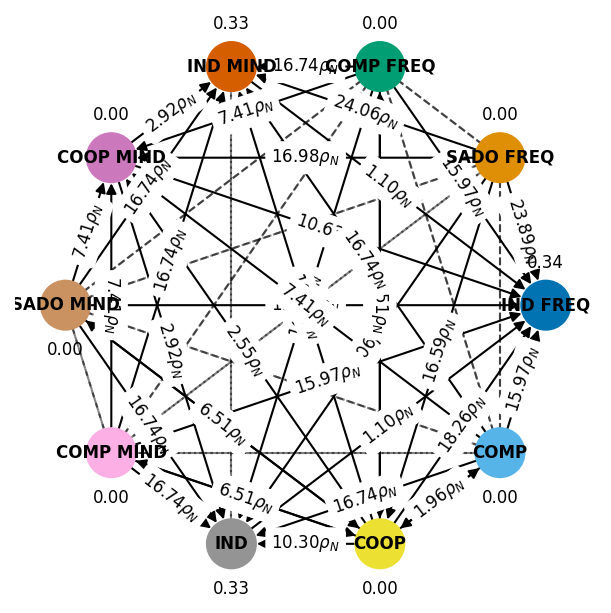

In [53]:
#default
#Z= 55; beta=1

Z= 55
beta=1

plotting(Z,beta,nya,strategies_list,strategy_labels_sample)

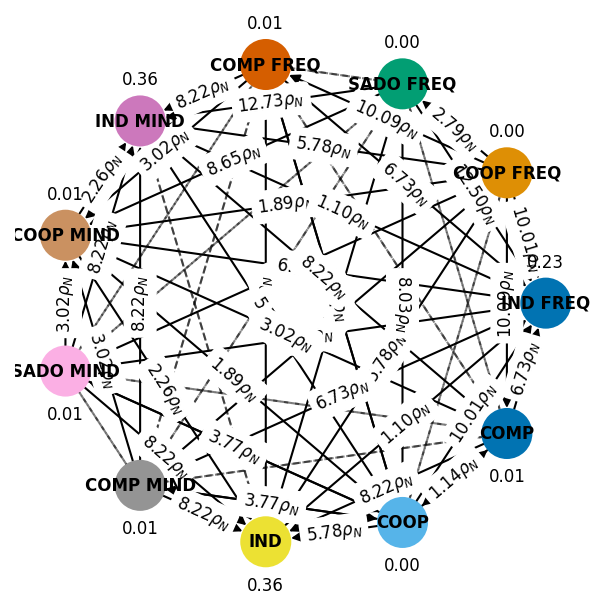

In [54]:
for i in range(1):
    plotting(30*(i+1),beta,nya,strategies_list,strategy_labels_sample,mu_=0.1)

簡単な組み合わせ、マトリックスで、予想を立ててから実行し、理論・予想が正しいことを確認していく

テストマトリックス

テスト戦略リスト

テスト実行

In [55]:
#テストマトリックス
test_Matlist = np.array([
    [[1,0],
     [0,1]],
    ])


test_angle = 90
print("Freq :",FrequencySVOStrategy(test_Matlist,test_angle).get_action(1,0,test_Matlist[0]))
print("Mind :",MindReadingSVOStrategy(test_Matlist,test_angle).get_action(1,0,test_Matlist[0]))
print("Def  :",SVOStrategy(test_Matlist,test_angle).get_action(1,0,test_Matlist[0]))

#テスト戦略リスト
test_strategies_list = [
            FrequencySVOStrategy(A,0),
            FrequencySVOStrategy(A,45),]

d_s = "Def"
m_s = "Mind"
f_s = "Freq"

#1人目
parameta_self = f_s
angle_self = 90

#2人目
parameta_oppo = d_s
angle_oppo = 90

def createAgent(parameta,matlist,angle):
    if parameta == d_s:
        agents_ = SVOStrategy(matlist,angle)
    elif parameta == m_s:
        agents_ = MindReadingSVOStrategy(matlist,angle)
    elif parameta == f_s:
        agents_ = FrequencySVOStrategy(matlist,angle)

    return agents_

#print("create test : ",createAgent(parameta_self,test_Matlist[0],test_angle).get_action(1,0,test_Matlist[0]))


test_strategies_list = [
            createAgent(parameta_self,A,angle_self),
            createAgent(parameta_oppo,A,angle_oppo),]

print()
test_strategy_labels_sample = [strategy.type().replace("NFGStrategies::", '') for strategy in test_strategies_list]
print(test_strategy_labels_sample)

test_bow = TwoStepsGame(len(test_Matlist),test_Matlist,test_strategies_list,DEBUG=True)
test_nya = test_bow.CalculateSimulation()
print(test_nya)


0.5 ALT FREQ
Freq : 0
0.5 ALT MIND
Mind : 0
Def  : 0

['ALT FREQ', 'ALT']

ALT FREQ  main : opp  ALT FREQ
0.5 ALT FREQ
0.5 ALT FREQ
0  main : opp   0
main score:  1

ALT FREQ  main : opp  ALT
0.5 ALT FREQ
0  main : opp   0
main score:  1

ALT  main : opp  ALT FREQ
0.5 ALT FREQ
0  main : opp   0
main score:  1

ALT  main : opp  ALT
0  main : opp   0
main score:  1
[[1. 1.]
 [1. 1.]]


C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\3330976997.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":
C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\3267850945.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":


In [56]:
#テストマトリックス
test_Matlist = np.array([
    [[1,0],
     [0,1]],
    ])

#1人目
parameta_self = m_s
angle_self = 0

#2人目
parameta_oppo = d_s
angle_oppo = 0

print("matrix payoffs : ")
print(test_Matlist)

test_strategies_list = [
            createAgent(parameta_self,A,angle_self),
            createAgent(parameta_oppo,A,angle_oppo),]

test_strategy_labels_sample = [strategy.type().replace("NFGStrategies::", '') for strategy in test_strategies_list]
print("agent type : ")
print(test_strategy_labels_sample)

test_bow = TwoStepsGame(len(test_Matlist),test_Matlist,test_strategies_list,DEBUG=True)
test_nya = test_bow.CalculateSimulation()
print()
print("average payoffs : ")
print(test_nya)


matrix payoffs : 
[[[1 0]
  [0 1]]]
agent type : 
['IND MIND', 'IND']

IND MIND  main : opp  IND MIND
0.5 IND MIND
0.5 IND MIND
0  main : opp   0
main score:  1

IND MIND  main : opp  IND
0.5 IND MIND
0  main : opp   0
main score:  1

IND  main : opp  IND MIND
0.5 IND MIND
0  main : opp   0
main score:  1

IND  main : opp  IND
0  main : opp   0
main score:  1

average payoffs : 
[[1. 1.]
 [1. 1.]]


C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\1699229542.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":
C:\Users\zxcas\AppData\Local\Temp\ipykernel_20320\3267850945.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if box == "def":


In [57]:
payoffs = np.array([[1, 0, 0],
                    [0, 2, 0],
                    [0, 0, 3]])

In [58]:
simplex = egt.plotting.Simplex2D()

In [59]:
v = np.asarray(xy_to_barycentric_coordinates(simplex.X, simplex.Y, simplex.corners))

In [60]:
results = vectorized_replicator_equation(v, payoffs)
xy_results = vectorized_barycentric_to_xy_coordinates(results, simplex.corners)
Ux = xy_results[:, :, 0].astype(np.float64)
Uy = xy_results[:, :, 1].astype(np.float64) 

In [61]:
calculate_gradients = lambda u: egt.analytical.replicator_equation(u, payoffs)

roots, roots_xy = calculate_stationary_points(simplex.trimesh.x, simplex.trimesh.y, simplex.corners, calculate_gradients)
stability = calculate_stability(roots, calculate_gradients)

In [62]:
type_labels = ['A', 'B', 'C']

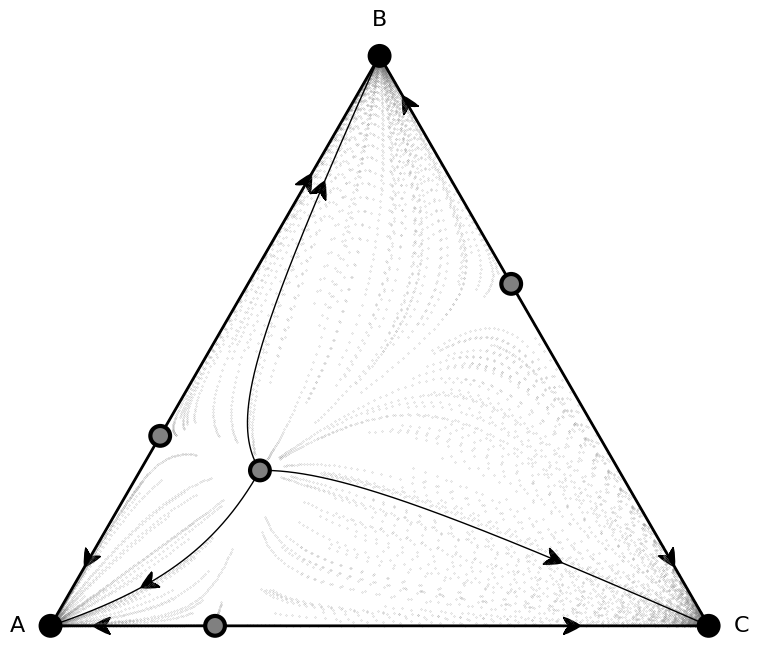

In [63]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_triangle()
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

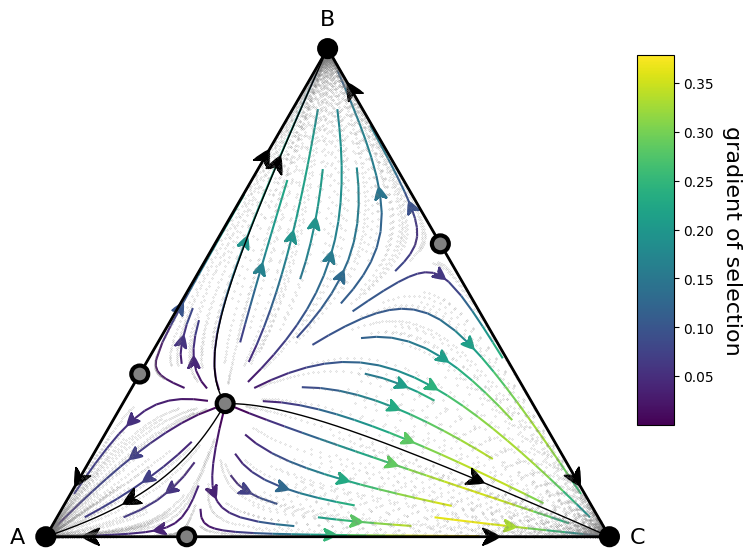

In [64]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_triangle()
           .draw_gradients(zorder=0)
           .add_colorbar()
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1, zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05, 1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

In [65]:
Z = 100
beta = 1
mu = 1e-3

In [66]:
simplex = egt.plotting.Simplex2D(discrete=True, size=Z, nb_points=Z+1)

In [67]:
v = np.asarray(xy_to_barycentric_coordinates(simplex.X, simplex.Y, simplex.corners))

In [68]:
v_int = np.floor(v * Z).astype(np.int64)

In [69]:
evolver = egt.analytical.StochDynamics(3, payoffs, Z)

In [70]:
result = np.asarray([[evolver.full_gradient_selection(v_int[:, i, j], beta) for j in range(v_int.shape[2])] for i in range(v_int.shape[1])]).swapaxes(0, 1).swapaxes(0, 2)


In [71]:
xy_results = vectorized_barycentric_to_xy_coordinates(result, simplex.corners)

Ux = xy_results[:, :, 0].astype(np.float64)
Uy = xy_results[:, :, 1].astype(np.float64)

In [72]:
calculate_gradients = lambda u: Z*evolver.full_gradient_selection(u, beta)

roots = find_roots_in_discrete_barycentric_coordinates(calculate_gradients, Z, nb_interior_points=5151, atol=1e-1)
roots_xy = [barycentric_to_xy_coordinates(x, simplex.corners) for x in roots]
stability = calculate_stability(roots, calculate_gradients)

下はとても時間がかかる

In [73]:
#evolver.mu = 1e-3
#sd = evolver.calculate_stationary_distribution(beta)

In [74]:
#fig, ax = plt.subplots(figsize=(15,10))

"""
plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_gradients(zorder=5)
           .add_colorbar()
           .draw_stationary_points(roots_xy, stability, zorder=11)
           .add_vertex_labels(type_labels)
           .draw_stationary_distribution(sd, vmax=0.0001, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=10, arrowstyle='fancy')
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

"""

"\nplot = (simplex.add_axis(ax=ax)\n           .apply_simplex_boundaries_to_gradients(Ux, Uy)\n           .draw_gradients(zorder=5)\n           .add_colorbar()\n           .draw_stationary_points(roots_xy, stability, zorder=11)\n           .add_vertex_labels(type_labels)\n           .draw_stationary_distribution(sd, vmax=0.0001, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)\n           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), \n                                       roots,\n                                       stability,\n                                       trajectory_length=30,\n                                       linewidth=1,\n                                       step=0.001,\n                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=10, arrowstyle='fancy')\n          )\n\nax.axis('off')\nax.set_aspect('equal')\n\nplt.xlim((-.05,1.05)

In [75]:
"""

fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels)
           .draw_stationary_distribution(sd, vmax=0.0001, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud')
           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), 
                                       roots,
                                       stability,
                                       trajectory_length=30,
                                       linewidth=1,
                                       step=0.001,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

"""

"\n\nfig, ax = plt.subplots(figsize=(10,8))\n\nplot = (simplex.add_axis(ax=ax)\n           .apply_simplex_boundaries_to_gradients(Ux, Uy)\n           .draw_stationary_points(roots_xy, stability)\n           .add_vertex_labels(type_labels)\n           .draw_stationary_distribution(sd, vmax=0.0001, alpha=0.5, edgecolors='gray', cmap='binary', shading='gouraud')\n           .draw_trajectory_from_roots(lambda u, t: Z*evolver.full_gradient_selection_without_mutation(u, beta), \n                                       roots,\n                                       stability,\n                                       trajectory_length=30,\n                                       linewidth=1,\n                                       step=0.001,\n                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')\n          )\n\nax.axis('off')\nax.set_aspect('equal')\n\nplt.xlim((-.05,1.05))\nplt.ylim((-.02, simplex.top_corner + 0.05